input vector
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
expected output vector=
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]
y2_pred
[[2.03535316 2.03535316 2.03535316 2.03535316 2.03535316 2.03535316
  2.03535316 2.03535316 2.03535316 2.03535316]]


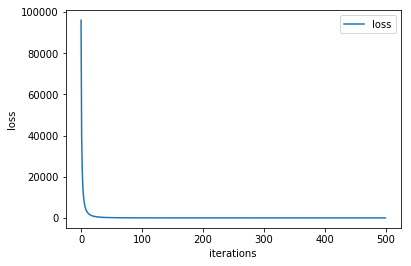

In [1]:
# This example is written for demonstrating a two-layer CNN.
# Both input and output are multi-dimensional vectors
# Only a relu is put after the 1st layer.
# 2019 Alex

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib


# setting 1
#x = np.random.randn(1, 10)
# setting 2
x = np.ones(10)
x = x.reshape(1,10)


# setting 1
#y2_GT = 2*np.random.randn(1, 10)
# setting 2
y2_GT = 2*np.ones(10)
y2_GT = y2_GT.reshape(1,10)

print("input vector")
print(x)
print("expected output vector=")
print(y2_GT)

# Randomly initialize weights
# setting 1
#w1 = np.random.randn(10, 10)
#w2 = np.random.randn(10, 10)

# setting 2
w1 = np.ones(100)
w1 = w1.reshape(10,10)
w2 = np.ones(100)
w2 = w2.reshape(10,10)

# setting 1
#learning_rate = 0.001 #0.01 would result in dead relu; 0.001 would work
#iterations=100  # 100 might not reach 0 loss but 1000 is more likely
#

# setting 2
learning_rate = 0.0001 #0.001 would result in dead relu; 0.0001 would work
iterations=500
#

# for displaying the variation of weighting of 1st layer and 2nd layer
w1_history= np.zeros(iterations)
w2_history= np.zeros(iterations)

# for displaying the output of the 1st layer
y1_history= np.zeros(iterations)
Inference_result_history= np.zeros(iterations)
loss_history= np.zeros(iterations)

for t in range(iterations):
    # 1st layer inference    
    y1 = x.dot(w1)
    
    # doing relu for the output of 1st layer
    y1_relu = np.maximum(y1, 0) # result is a row vector

    #print "y1_relu="
    #print y1_relu

    # store the output of the 1st layer
    y1_history[t]= np.mean(y1_relu)

    # performing 2nd layer computation
    y2_pred = y1_relu.dot(w2) # result is a row vector

    #print w2
    #print y2_pred

    Inference_result_history[t] = np.mean(y2_pred)

    # Compute and print loss
    loss = np.square(y2_pred - y2_GT).sum()
    loss_history[t]=loss
    #print y_pred.shape
    #print np.mean(y_pred)

    #print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y2_pred = 2.0 * (y2_pred - y2_GT) # d_loss/d_y2                 
    grad_w2 = y1_relu.T.dot(grad_y2_pred)# (d_y2/d_w2)*(d_loss/d_y2)=d_loss/d_w2    
    grad_y1_relu = grad_y2_pred.dot(w2.T) # (d_loss/d_y2)*(d_y2/d_y1)=d_loss/d_y1
    grad_y1 = grad_y1_relu.copy()
    grad_y1[y1 < 0] = 0 # only numbers through relu would be conducted backward pass
    grad_w1 = x.T.dot(grad_y1) # (d_y1/d_w1)*(d_loss/d_y2)*(d_y2/d_y1)=(d_y1/d_w1)*(d_loss/d_y1)=d_loss/d_w1

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

    w1_history[t]= np.mean(w1)
    w2_history[t]= np.mean(w2)

    # forward result of each iteration

# 


print("y2_pred")
print(y2_pred)

input_epoch = np.array(range(iterations))

plt.plot(input_epoch,loss_history)
plt.legend(['loss'])
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()









